<a href="https://colab.research.google.com/github/karandoshi1810/Machine-Learning/blob/main/All_Classification_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#To import datafiles from Google Drive
from google.colab import drive

In [ ]:
#To mount the drive data into colab cloud and enter the activation code
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset"

/content/drive/My Drive/Colab Notebooks/Dataset


In [ ]:
#reading data from drive using pandas library
df=pd.read_csv("Elections.csv")
print(df)


       County2012Id StateCode  CountyName  ...  FirstName  LastName  Votes
0                 2        AK      Alaska  ...     Barack     Obama  91696
1                 4        AL     Autauga  ...     Barack     Obama   6354
2                 5        AL     Baldwin  ...     Barack     Obama  18329
3                 6        AL     Barbour  ...     Barack     Obama   5873
4                 7        AL        Bibb  ...     Barack     Obama   2200
...             ...       ...         ...  ...        ...       ...    ...
23233         23594        CO      Summit  ...      Jerry     White      1
23234         23595        CO      Teller  ...      Jerry     White      1
23235         23596        CO  Washington  ...      Jerry     White      1
23236         23597        CO        Weld  ...      Jerry     White      5
23237         23598        CO        Yuma  ...      Jerry     White      0

[23238 rows x 13 columns]


In [ ]:
print(df.corr())

                   County2012Id  CountyNumber  ...  SourceOrder     Votes
County2012Id           1.000000     -0.066637  ...     0.777452 -0.196587
CountyNumber          -0.066637      1.000000  ...    -0.164556 -0.012829
FipsCode              -0.060955      0.999576  ...    -0.161498 -0.014130
PrecintsReporting      0.041979     -0.060354  ...     0.071490  0.492556
TotalPrecincts         0.042061     -0.058946  ...     0.071633  0.492486
CountyTotalVotes       0.056731     -0.058504  ...     0.095874  0.531315
SourceOrder            0.777452     -0.164556  ...     1.000000 -0.144967
Votes                 -0.196587     -0.012829  ...    -0.144967  1.000000

[8 rows x 8 columns]


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['Party']=le.fit_transform(df['Party'])

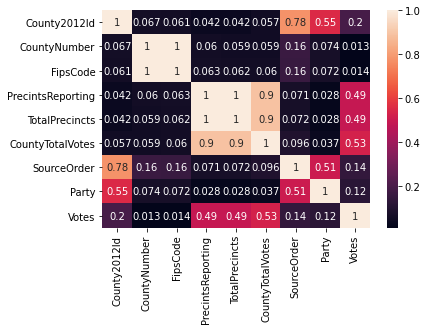

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only  columns
df_small = df.iloc[:,:13]

correlation_mat = df_small.corr(min_periods=13).abs()

sns.heatmap(correlation_mat, annot = True)

plt.show()


In [ ]:
df1=df[["County2012Id","CountyNumber","FipsCode","PrecintsReporting","TotalPrecincts","CountyTotalVotes","SourceOrder","Votes","Party"]].copy()
df1

,County2012Id,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Votes,Party
0,2,2001,2000,437,438,220596,1,91696,5
1,4,1001,1001,28,28,23909,1,6354,5
2,5,1002,1003,55,55,84988,1,18329,5
3,6,1003,1005,19,19,11459,1,5873,5
4,7,1004,1007,10,10,8391,1,2200,5
...,...,...,...,...,...,...,...,...,...
23233,23594,6059,8117,20,20,15038,16,1,26
23234,23595,6060,8119,13,13,12144,16,1,26
23235,23596,6061,8121,6,6,2567,16,1,26
23236,23597,6062,8123,109,109,112695,16,5,26


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df1, df1['Party'], test_size=0.3) # 70% training and 30% test
print(y_test)

18551     3
2777      5
6629      6
10630    14
73        5
         ..
5644      6
22418    21
17024     9
13439    14
5900      6
Name: Party, Length: 6972, dtype: int64


In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)

  #Train the model using the training sets
  knn.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test)

  #Import scikit-learn metrics module for accuracy calculation
  from sklearn.metrics import precision_score, recall_score, f1_score
  # Model Accuracy, how often is the classifier correct?
  print("For neighbor:",i)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
  print("Precision:",precision_score(y_test, y_pred,average='macro')*100)
  print("Recall:",recall_score(y_test, y_pred,average='macro')*100) 
  print("--------------------------------------------------------------")   

For neighbor: 1
Accuracy: 86.02983362019506
Precision: 70.37614864329613
Recall: 68.10953105377824
--------------------------------------------------------------
For neighbor: 2
Accuracy: 84.03614457831326
Precision: 72.26275853810236
Recall: 63.161112431909515
--------------------------------------------------------------
For neighbor: 3
Accuracy: 83.1181870338497
Precision: 70.6781571437377
Recall: 62.37729713895792
--------------------------------------------------------------
For neighbor: 4
Accuracy: 81.74125071715433
Precision: 67.64749823829828
Recall: 59.232083193376624
--------------------------------------------------------------
For neighbor: 5
Accuracy: 81.03843947217442
Precision: 68.29981414804374
Recall: 58.92693991046001
--------------------------------------------------------------
For neighbor: 6
Accuracy: 80.06310958118186
Precision: 66.15059013620895
Recall: 56.916150450337376
--------------------------------------------------------------
For neighbor: 7
Accuracy: 7

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 9
Accuracy: 78.12679288582903
Precision: 60.30133220033838
Recall: 53.44558800521184
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 10
Accuracy: 77.89730349971313
Precision: 58.709224109330236
Recall: 51.96199668145185
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 11
Accuracy: 77.35226620768789
Precision: 58.71482183996787
Recall: 50.75717941708262
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 12
Accuracy: 76.87894434882386
Precision: 58.34635463026311
Recall: 49.37618883120376
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 13
Accuracy: 76.1617900172117
Precision: 56.847933487528536
Recall: 46.15438551603657
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 14
Accuracy: 75.78886976477338
Precision: 51.77043720505483
Recall: 42.92118981443706
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 15
Accuracy: 75.44463568559954
Precision: 52.898631062248704
Recall: 42.49851730693647
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 16
Accuracy: 75.08605851979347
Precision: 53.97232852715131
Recall: 42.0675950796371
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 17
Accuracy: 74.59839357429718
Precision: 53.09197890744943
Recall: 41.57486267061991
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 18
Accuracy: 74.72748135398739
Precision: 52.14272902384711
Recall: 41.824673500441776
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 19
Accuracy: 74.64142283419392
Precision: 50.22976376325179
Recall: 41.17521235870913
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For neighbor: 20
Accuracy: 74.18244406196214
Precision: 50.4953718263943
Recall: 40.98123925948693
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
''' My Conclusion for KNN:
    I can conclude from this that with increasing value of K the accuracy,precision and recall decreases. 
    Hence for increasing value of K, it might fall into the other class of classification. Hence it can be
    said that increasing value of K the algorithm is not able to decide where to classify the points at the
    border of two clusters'''

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(X_train,y_train)


predictions=rf.predict(X_test)

errors=abs(predictions-y_test)
errors

18551    0.0
2777     0.0
6629     0.0
10630    0.0
73       0.0
        ... 
5644     0.0
22418    0.0
17024    0.0
13439    0.0
5900     0.0
Name: Party, Length: 6972, dtype: float64

In [ ]:
#Mean absolute percentage error
mape=100*(errors/y_test)

mean_error=np.mean(mape)
mean_error

0.0007275670745037741

In [ ]:

accuracy=100-mean_error
accuracy

99.9992724329255

In [ ]:
from sklearn.tree import export_graphviz
import pydot

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
tree=rf.estimators_[5]
feature_list=list(df1.columns)
export_graphviz(tree,out_file='tree.dot',feature_names=feature_list,rounded=True,precision=1)
(graph,)=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Accuracy: 74.18244406196214


In [ ]:
'''My Conclusion:
   It can be concluded that the accuracy of the model is appropriate. But is still less than KNN. '''

In [ ]:
#K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

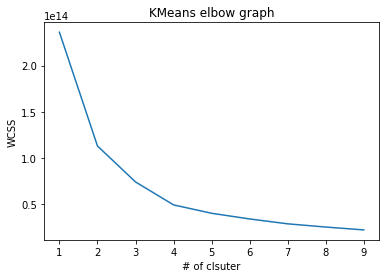

In [ ]:
x=np.array(df1)
wcss=[] #Within Clusters Sum of Squares
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('KMeans elbow graph')
plt.ylabel('WCSS')
plt.xlabel('# of clsuter')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 1, 0, ..., 1, 0, 1], dtype=int32)

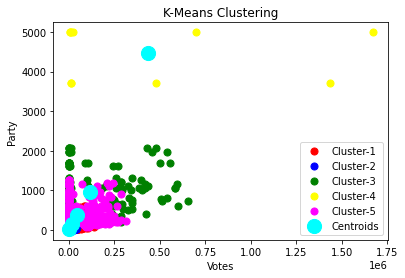

In [ ]:
#Visualize the cluster

plt.scatter(x[y_kmeans==0,7],x[y_kmeans==0,4],s=50,c='red',label='Cluster-1')
plt.scatter(x[y_kmeans==1,7],x[y_kmeans==1,4],s=50,c='blue',label='Cluster-2')
plt.scatter(x[y_kmeans==2,7],x[y_kmeans==2,4],s=50,c='green',label='Cluster-3')
plt.scatter(x[y_kmeans==3,7],x[y_kmeans==3,4],s=50,c='yellow',label='Cluster-4')
plt.scatter(x[y_kmeans==4,7],x[y_kmeans==4,4],s=50,c='magenta',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,7],kmeans.cluster_centers_[:,3],s=200,c='cyan',label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Votes')
plt.ylabel('Percints Reporting')
plt.legend()
plt.show()

In [ ]:
#Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch

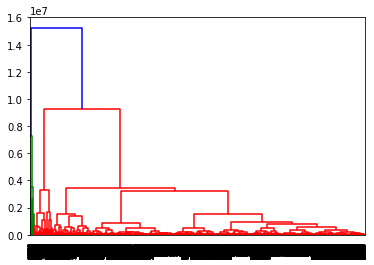

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df1,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [ ]:
y_hc = hc.fit_predict(df1)

In [ ]:
print(y_hc)

[2 0 2 ... 0 0 0]


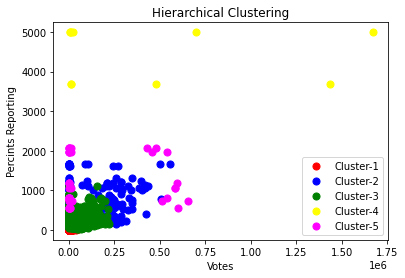

In [ ]:
#Visualize the cluster
X=df1.values
plt.scatter(X[y_hc==0,7],X[y_hc==0,3],s=50,c='red',label='Cluster-1')
plt.scatter(X[y_hc==1,7],X[y_hc==1,3],s=50,c='blue',label='Cluster-2')
plt.scatter(X[y_hc==2,7],X[y_hc==2,3],s=50,c='green',label='Cluster-3')
plt.scatter(X[y_hc==3,7],X[y_hc==3,3],s=50,c='yellow',label='Cluster-4')
plt.scatter(X[y_hc==4,7],X[y_hc==4,3],s=50,c='magenta',label='Cluster-5')

plt.title('Hierarchical Clustering')
plt.xlabel('Votes')
plt.ylabel('Percints Reporting')
plt.legend()
plt.show()

In [ ]:
#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

X=df1.iloc[0:2000, : ]
X=StandardScaler().fit_transform(X)
ns=5
nearestneighbours=NearestNeighbors(5).fit(X)
nearestneighbours

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
distances, indices = nearestneighbours.kneighbors(X)
indices


array([[   0,  206,  196,  207,  198],
       [   1,    5,   16,   23,   17],
       [   2,   59,   63,   41,   52],
       ...,
       [1997, 1962, 1945, 1932, 1923],
       [1998, 1992, 1999, 1991, 1963],
       [1999, 1992, 1985, 1974, 1998]])

In [ ]:
distanceDec = sorted(distances[:,ns-1], reverse=True)
distances

array([[0.        , 0.82569372, 0.83492814, 0.9973306 , 1.07679072],
       [0.        , 0.05371108, 0.06833329, 0.07437419, 0.0907822 ],
       [0.        , 0.19747228, 0.24633222, 0.32202945, 0.35107505],
       ...,
       [0.        , 0.10142701, 0.10959292, 0.11392966, 0.14317789],
       [0.        , 0.05421388, 0.06036656, 0.07069277, 0.0768125 ],
       [0.        , 0.04252907, 0.05270996, 0.05591189, 0.06036656]])

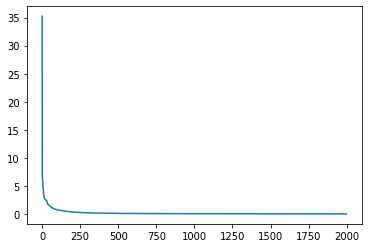

In [ ]:
plt.plot(indices[:,0], distanceDec)

In [ ]:
db=DBSCAN(eps=0.4,min_samples=5).fit(X)

In [ ]:
labels = db.labels_
db.labels_

array([ -1,   0,   0, ..., 165,  -1, 165])

In [ ]:
db.core_sample_indices_   #Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

array([    1,     2,     3, ..., 23234, 23235, 23237])

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [ ]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [ ]:
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 166
Estimated number of noise points: 1631


In [ ]:
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

In [ ]:
np.linspace(0, 1, len(unique_labels))

array([0.        , 0.0060241 , 0.01204819, 0.01807229, 0.02409639,
       0.03012048, 0.03614458, 0.04216867, 0.04819277, 0.05421687,
       0.06024096, 0.06626506, 0.07228916, 0.07831325, 0.08433735,
       0.09036145, 0.09638554, 0.10240964, 0.10843373, 0.11445783,
       0.12048193, 0.12650602, 0.13253012, 0.13855422, 0.14457831,
       0.15060241, 0.15662651, 0.1626506 , 0.1686747 , 0.1746988 ,
       0.18072289, 0.18674699, 0.19277108, 0.19879518, 0.20481928,
       0.21084337, 0.21686747, 0.22289157, 0.22891566, 0.23493976,
       0.24096386, 0.24698795, 0.25301205, 0.25903614, 0.26506024,
       0.27108434, 0.27710843, 0.28313253, 0.28915663, 0.29518072,
       0.30120482, 0.30722892, 0.31325301, 0.31927711, 0.3253012 ,
       0.3313253 , 0.3373494 , 0.34337349, 0.34939759, 0.35542169,
       0.36144578, 0.36746988, 0.37349398, 0.37951807, 0.38554217,
       0.39156627, 0.39759036, 0.40361446, 0.40963855, 0.41566265,
       0.42168675, 0.42771084, 0.43373494, 0.43975904, 0.44578

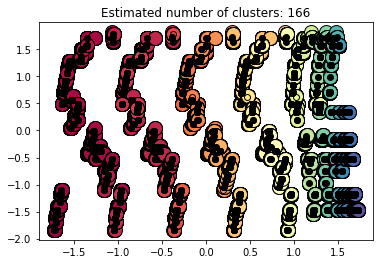

In [ ]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)          #noise point will be true else it will be false

    xy = X[class_member_mask & core_samples_mask]                             #core sample and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]                            #not core sample i.e boundary samples and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
labels

array([ -1,   0,   0, ..., 165,  -1, 165])

In [ ]:
class_member_mask

array([ True, False, False, ..., False,  True, False])

In [ ]:
''' Overall Conclusion
    I can conclude that in supervised learning algorithm KNN has better accuracy if K is chosen wisely. For increasing value of K the value of accuracy, recall and precision 
    is decreasing.
    
    For unsupervised ML it can be said that if outliers are constraints then it can be used and also it will not have any model parameters to be defined so it will reduce
    computation. K means can be used if value of K can be defined accurately.
    
    Agglomerative clustering gives the overall view of the dataset in the form of tree structure and it uses distance as parameter for clustering. It is effective if there are
    border points and it will be easy to classify.''''